# Décimo Primer Desafío: Evaluando Modelos de Machine Learning

### Objetivo

Se presenta como objetivo para este desafío entrenar un algoritmo de ML utilizando los datos que se presentaron en entregas anteriores y que corresponderán al proyecto final. Como se comentó en desafíos y entregas anteriores los datos utilizados para los análisis refieren a una lista de pacientes con diferentes diagnósticos de cáncer de pulmón, así como diferentes padecimientos, malestares o hábitos que los mismos presentan y que pueden estar asociados o no al cáncer. Además disponemos de la nacionalidad, sexo y edad de cada paciente.

Se puede acceder al set de datos original a través del siguiente enlace: 

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

A continuación importamos las librerías que necesitamos y además el set de datos:

In [2]:
### Importa Pandas para traer el set de datos
import pandas as pd
import numpy as np
### Importo para futuros gráficos
import matplotlib.pyplot as plt
import seaborn as sns

Importamos a priori estas dos librerías y usaremos Pandas para importar los datos y trabajarlos.

In [3]:
### Cargo el archivo 
cancer_pulmon = pd.read_csv('C:/Users/175544/Desktop/Curso Coderhouse/Data Science/Avances PF/cancer_pulmon.csv',
                               delimiter=';')
cancer_pulmon.head()

,ID,first_name,last_name,gender,age,country,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,81,Abrahan,Costa,Male,18,Russia,1,1,1,1,1,2,1,1,1,1,2,1,1,NO
1,130,Matilde,Gutowski,Female,18,China,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
2,205,Nikkie,Maddin,Female,18,Mexico,2,1,1,1,2,2,2,1,2,2,2,2,2,YES
3,385,Ailbert,Scrowby,Male,18,New Zealand,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
4,434,Beau,Lemery,Male,18,Indonesia,2,1,1,1,1,1,2,1,2,2,1,1,2,YES


El siguiente paso es realizar el proceso de limpieza del set de datos, en el cual se normalizarán las columnas (traduciremos los encabezados de las columnas), así mismo analizaremos si existen datos faltantes (nulos), duplicados o atípicos.

In [4]:
# Renombro las columnas y ordeno por ID de menor a mayor.
cancer_pulmon.rename(columns={'ID':'id',
                              'first_name':'nombre',
                              'last_name':'apellido',
                              'gender':'genero',
                              'age':'edad',
                              'country':'pais',
                              'SMOKING':'fumador',
                              'YELLOW_FINGERS':'dedos_amarillos',
                              'ANXIETY':'ansiedad',
                              'PEER_PRESSURE':'presion_social',
                              'CHRONIC DISEASE':'enfermedad_cronica',
                              'FATIGUE ':'fatiga',
                              'ALLERGY ':'alergias',
                              'WHEEZING':'sibilancia',
                              'ALCOHOL CONSUMING':'consume_alcohol',
                              'COUGHING':'tos',
                              'SHORTNESS OF BREATH':'dificultad_respiratoria',
                              'SWALLOWING DIFFICULTY':'dificultad_al_tragar',
                              'CHEST PAIN':'dolor_de_pecho',
                              'LUNG_CANCER':'cancer_pulmon'}
                     ,inplace=True)
cancer_pulmon.sort_values('id',inplace=True)
cancer_pulmon.reset_index(drop=True,inplace=True)

In [5]:
# Reemplazo los valores 1 y 2 de las columnas con no y sí respectivamente
columnas = ['fumador','dedos_amarillos','ansiedad','presion_social',
            'enfermedad_cronica','fatiga','alergias','sibilancia',
            'consume_alcohol','tos','dificultad_respiratoria',
            'dificultad_al_tragar','dolor_de_pecho','cancer_pulmon']
cancer_pulmon[columnas] = cancer_pulmon[columnas].replace([1,2,"NO","YES"],["no","si","no","si"])

In [6]:
### Observamos el set de datos hasta el momento
cancer_pulmon.head()

,id,nombre,apellido,genero,edad,pais,fumador,dedos_amarillos,ansiedad,presion_social,enfermedad_cronica,fatiga,alergias,sibilancia,consume_alcohol,tos,dificultad_respiratoria,dificultad_al_tragar,dolor_de_pecho,cancer_pulmon
0,1,Darsey,Jerrems,Female,49,Portugal,no,si,si,no,no,si,no,si,si,si,si,si,si,si
1,2,Ray,Duerdin,Male,56,Armenia,si,no,no,no,si,si,si,no,no,no,si,si,si,si
2,3,Yurik,Hugonin,Male,51,Russia,no,no,no,si,no,si,no,si,no,si,si,no,si,no
3,4,Ruprecht,Sammon,Male,98,Portugal,si,si,si,no,no,no,no,no,si,no,no,si,si,no
4,5,Fabian,Carrivick,Male,97,China,no,si,no,no,no,no,no,si,no,si,si,no,no,no


Ahora observaremos si existen valores nulos, duplicados o atípicos.

In [7]:
### Podemos saber si existen nulos con la función siguiente
cancer_pulmon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       2000 non-null   int64 
 1   nombre                   2000 non-null   object
 2   apellido                 2000 non-null   object
 3   genero                   2000 non-null   object
 4   edad                     2000 non-null   int64 
 5   pais                     2000 non-null   object
 6   fumador                  2000 non-null   object
 7   dedos_amarillos          2000 non-null   object
 8   ansiedad                 2000 non-null   object
 9   presion_social           2000 non-null   object
 10  enfermedad_cronica       2000 non-null   object
 11  fatiga                   2000 non-null   object
 12  alergias                 2000 non-null   object
 13  sibilancia               2000 non-null   object
 14  consume_alcohol          2000 non-null  

Esta función planteada nos muestra si en alguna columna del set de datos existen valores nulos, además de que nos muestra la cantidad de filas que tenemos. Lo que nos dice es que tenemos 2000 filas que representan cada uno a un paciente y que además no hay valores nulos en las columnas.

Ahora probaremos si existen pacientes duplicados. Para eso planteemos lo siguiente: sabemos que el set de datos es una lista de pacientes con diferentes características como la edad, género y nacionalidad, además de las ya citadas enfermedades o hábitos.  Lo que podemos hacer es eliminar duplicados y chequear la cantidad de pacientes de la siguiente manera:

In [8]:
### Eliminamos duplicados a priori y contamos la cantidad que queda
cancer_pulmon.drop_duplicates(subset = ['nombre', 'apellido'])['id'].count()

2000

Esto nos muestra que no existen valores duplicados por nombre y apellido de pacientes, así que podemos interpretarlo como que los pacientes listados no están repetidos.

Lo que nos resta entender es si existen valores atípicos. Los valores atípicos son aquellos que no se ajustan a la norma como los demás valores. Para considerar esto pensemos un momento en nuestro set de datos: como ya se dijo, el set de datos consta de una lista de pacientes con diferentes características y que además están clasificados por padecimientos. ¿Cómo podría alguno de ellos representar un valor atípico? La respuesta es que ninguno podría ser un valor atípico ya que no existe o no tenemos pensada una norma para los mismos.

Finalizada la etapa de limpieza de los datos procederemos a realizar todo lo relacionado a entrenamiento de un modelo de ML. Al ser nuestro set de datos una lista de pacientes con diagnóstico positivo o negativo lo que tenemos que utilizar será algún modelo de Clasificación, entre los que se encuentran Árbol de Decisión, Regresión Lineal, Vecinos más cercanos (KNN), entre muchos otros. Para este caso elegimos utilizar el modelo KNN.

Lo primero que debemos hacer es conocer la relación entre las diferentes columnas y determinar cuáles son las que efectivamente pueden asociarse al cáncer de pulmón. Lo que tenemos es que en el set de datos hay columnas que representan características de los clientes, como nombre, apellido, edad, etc, y otras columnas que representan diferentes hábitos y enfermedades, así como la columna que confirma si el paciente tiene cáncer o no. Lo que sabemos es que las columnas de hábitos y enfermedades nos pueden brindar una relación pero no de las columnas que representan características de los pacientes, ya que son únicas y exclusivas de cada uno. Por lo que analizando esto podemos elegir como columnas a relacionar las que tengan que ver efectivamente con hábitos y enfermedades.

A continuación se muestran los diferentes pasos a seguir para realizar todo el procedimiento. Lo que se desea hacer primero es transformar los datos string o object en numéricos con el método de Encoding, así como realizar una matriz de correlación para comprobar si efectivamente las columnas de padecimientos se relacionan con el diagnóstico. Para conocer si las columnas están relacionadas se mostrarán valores en la matriz que irán entre 1 y -1, siendo estos extremos la mayor correlación mientras que el centro 0 representa la menor relación posible.

In [9]:
### Importamos esto para transformar las variables de texto en número
from sklearn import preprocessing

In [10]:
### Armo el modelo de Encoding para las variables de texto
encoding = preprocessing.LabelEncoder()

In [11]:
### Armo un nuevo set de datos en base al original
cancer_pulmon_heatmap = cancer_pulmon.drop(columns = ['id', 'nombre', 'apellido', 'genero', 'edad', 'pais']) ### Elimino las columnas que no necesito

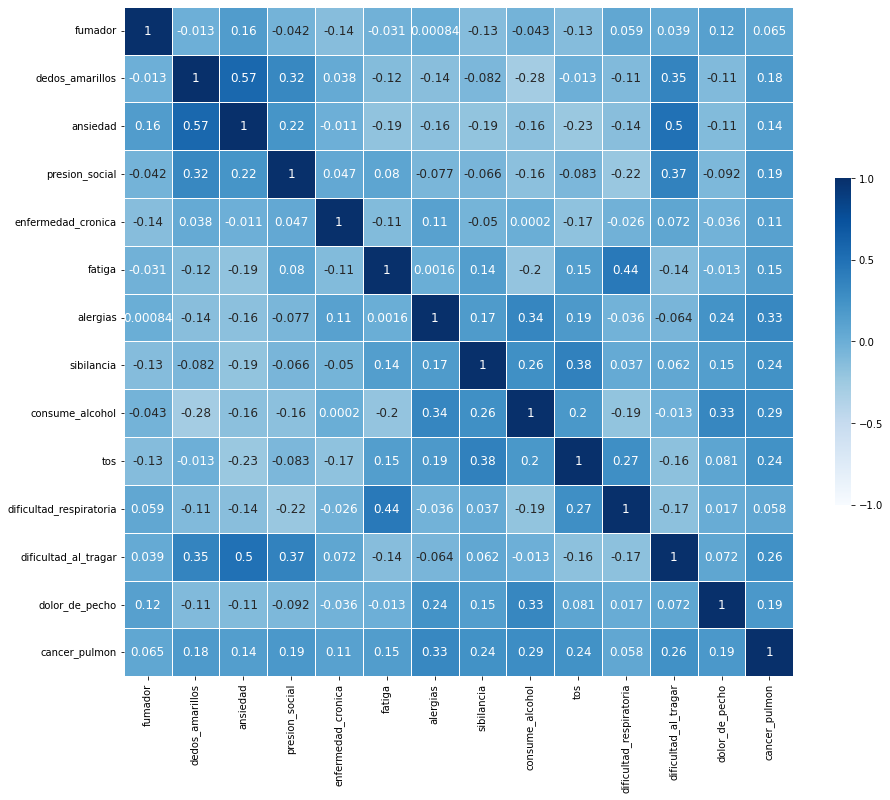

In [12]:
### Elimino las columnas que no presentan relación
cancer_heat = cancer_pulmon_heatmap

columnas = cancer_heat

for columna in columnas:

  # Aplico el modelo
  encoding.fit(cancer_heat[columna])
  list(encoding.classes_)

  # Transformo las variables
  cancer_heat[columna] = encoding.transform(cancer_heat[columna])

### Relleno los valores faltantes con ceros
cancer_heat.fillna(0)

### Armo la matriz de correlacion
matriz = cancer_heat.corr()

### Grafico la matriz en un heatmap
f, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(matriz,
                      # mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12},
                      cmap = 'Blues'
                    )

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Con esta matriz de correlación podemos darnos cuenta de que las asociaciones más importantes con diagnóstico son más la alergia, sibilancia, tos, dificultad al tragar y alcoholismo, mientras que la opción más lógica que es fumar resulta ser no tan "asociable" al diagnóstico, ya que la relación entre ambas es cercana a cero.

Ahora que tenemos esto finalizado y confirmamos la relación entre variables procedemos a entrenar el modelo de ML elegido, que es KNN. A continuación los pasos a seguir:

1. Establecer la variable objetivo: en este caso será el diagnóstico de los pacientes.
2. Tipo de modelo: como ya se comentó el set de datos puede tratarse con modelos de Clasificación.
3. Relación entre los datos: se determinó esto al realizar la matriz de correlación.
4. Selección de variables: se quedarán para el modelo las seleccionadas para realizar la matriz de correlación.
5. Prueba de modelos: se probará el modelo seleccionado, KNN.
6. Métricas: para este caso utilizaremos la métrica F1 Score junto con una matriz de confusión.

Conociendo los pasos principales comenzamos a entrenar un modelo de ML.

In [13]:
### Genero un nuevo set de datos con lo utilizado en el mapa de calor
cancer_enc = cancer_heat

### Elijo las columnas que serán las variables
y_col = ['cancer_pulmon'] ### Variable objetivo

x_cols = ['fumador', 'dedos_amarillos', 'ansiedad', 'presion_social',
           'enfermedad_cronica', 'fatiga', 'alergias', 'sibilancia',
           'consume_alcohol', 'tos', 'dificultad_respiratoria',
           'dificultad_al_tragar', 'dolor_de_pecho'] ### Variables elegidas para los modelos

In [14]:
### Importo librerías necesarias para entrenar y para probar los modelos
# Para entrenar y testear
from sklearn.model_selection import train_test_split
# Vecinos cercanos o KNN
from sklearn.neighbors import KNeighborsClassifier

#### Métricas
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Importo la librería warnings para no tener carteles molestos
import warnings as wn

Armo dos pares de variables:

1. De entrenamiento (train): estas servirán para entrenar los modelos de ML.
2. De testeo (test): estas servirán para probar si al calcular las métricas obtengo overfitting o underfitting.

In [15]:
### Genero los datos de entrenamiento para los modelos
Y = cancer_enc[y_col]

X = cancer_enc[x_cols]

### Variables de entrenamiento

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2, ## Porcentaje de los datos que será para testear los modelos
                                                    random_state = 50)

In [16]:
### Definición de modelo
# KNN
knn = KNeighborsClassifier()

### Armo una lista con los modelos

modelos = [knn]

El modelo que usaremos a continuacion es KNeighborsClassifier() ->
La métrica F1 Score del modelo de entrenamiento es de: 0.9764372484090419
La métrica F1 Score del modelo de testeo es de: 0.9632359102756523


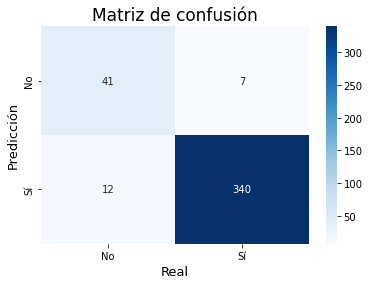

In [17]:
### Creo un for que pruebe en bucle cada modelo y las métricas, sirve para incluir otros modelos de ML

for modelo in modelos:

    wn.filterwarnings('ignore')

    print(f'El modelo que usaremos a continuacion es {modelo} ->')

    # Entreno los modelos
    modelo.fit(x_train, y_train)

    # Definimos el valor de prediccion
    y_train_pred = modelo.predict(x_train)
    y_pred = modelo.predict(x_test)

    # Calculo las métricas con F1 Score
    f1_train = np.mean(cross_val_score(modelo, x_train, y_train, cv=10, scoring='f1'))
    f1_test = np.mean(cross_val_score(modelo, x_test, y_test, cv=10, scoring='f1'))

    # Imprimimos los valores
    print(f'La métrica F1 Score del modelo de entrenamiento es de: {f1_train}')
    print(f'La métrica F1 Score del modelo de testeo es de: {f1_test}')

    # Uso además la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficamos la matriz de confusión
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'],
               cmap = 'Blues')
    plt.ylabel('Predicción',fontsize=13)
    plt.xlabel('Real',fontsize=13)
    plt.title('Matriz de confusión',fontsize=17)
    plt.show()

Lo que se nos presenta aquí es la forma en que el modelo predice los datos. Nos dice que los datos de entrenamiento (train) al aplicar la métrica F1 Score nos da cerca de 1, pero además los datos de testeo (test) también da cerca de 1, por lo que el modelo predice muy bien no solo los datos de entrenamiento sino además los de testeo, por lo que podría considerarse como un modelo apropiado ya que al suceder que ambas, tanto train como test, den cercanas a 1 quiere decir que no habría a priori overfitting. Pero, ¿por qué los resultados son tan favorables si se esperaba solamente que sean cercanos a 0,5? La respuesta a esto es que la mayoría de los pacientes tienen un diagnóstico positivo, por lo que el modelo no se tiene que esforzar mucho para predecir. Dejo a continuación un pequeño análisis que demuestra esto.

In [18]:
### Agrupamos por condición de cáncer.

cancer_si_no = cancer_pulmon.groupby(by = 'cancer_pulmon').agg({'id':'count'}).reset_index()
cancer_si_no.rename(columns = {'id':'cantidad_pacientes'}, inplace = True) ### Renombro la columna
cancer_si_no['porcentaje'] = np.round((cancer_si_no['cantidad_pacientes']/2000)*100,0) ### Genero una columna que me muestre la cantidad en porcentaje
cancer_si_no

,cancer_pulmon,cantidad_pacientes,porcentaje
0,no,252,13.0
1,si,1748,87.0


Se observa muy brevemente que el 87% de los pacientes presenta la enfermedad en este set de datos y esto distorciona la capacidad real del modelo para poder predecir.

### Análisis y agregación de variables al modelo

Lo que nos interesa ahora es lo siguiente: como el modelo predijo muy bien los datos lo siguiente a realizar es agregar más variables al proceso, con los debidos pasos previos como la matriz de correlación, encoding, etc. Las variables que quizás nos interese agregar al proceso son la edad y el género de los pacientes, ya que quizás estos resulten un buen indicativo a la hora de predecir el cáncer. Veremos la relación de las mismas y las elegidas previamente con la variable objetivo y observaremos de qué manera logra predecir el modelo.

In [24]:
### Armo un nuevo set de datos en base al original
new_cancer_pulmon_heatmap = cancer_pulmon.drop(columns = ['id', 'nombre', 'apellido', 'pais']) ### Elimino las columnas que no necesito

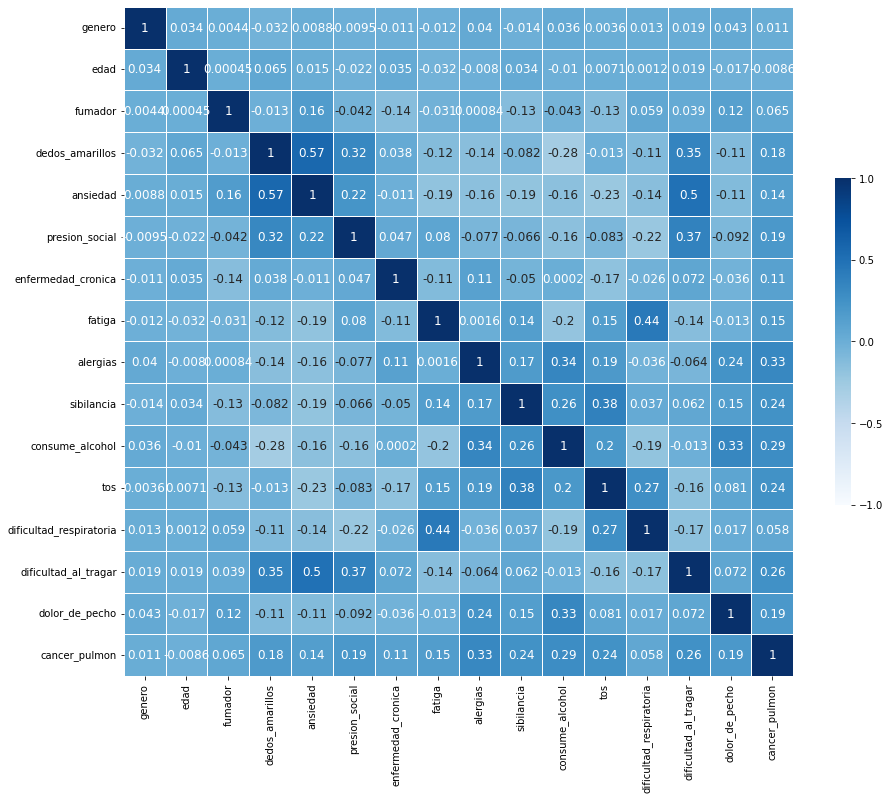

In [25]:
### Elimino las columnas que no presentan relación
new_cancer_heat = new_cancer_pulmon_heatmap

columnas = new_cancer_heat

for columna in columnas:

  # Aplico el modelo
  encoding.fit(new_cancer_heat[columna])
  list(encoding.classes_)

  # Transformo las variables
  new_cancer_heat[columna] = encoding.transform(new_cancer_heat[columna])

### Relleno los valores faltantes con ceros
new_cancer_heat.fillna(0)

### Armo la matriz de correlacion
matriz = new_cancer_heat.corr()

### Grafico la matriz en un heatmap
f, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(matriz,
                      # mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12},
                      cmap = 'Blues'
                    )

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Puede observarse en el mapa de calor que las nuevas variables agregadas, que en este caso son género y edad, son bastantes cercanas a 0 respecto de las demás, es decir que la relación de estas con el diagnóstico es mínima. Sabiendo que las demás variables también tienen comportamientos cercanos a 0 y que de igual manera el modelo de ML pudo predecir bien los datos de igual manera aplicaremos el modelo a este nuevo conjunto de variables.

Seguiremos los pasos que se realizaron previamente y utilizaremos tanto el mismo modelo de ML como las mismas métricas.

In [26]:
### Genero un nuevo set de datos con lo utilizado en el mapa de calor
new_cancer_enc = new_cancer_heat

### Elijo las columnas que serán las variables
y_col_new = ['cancer_pulmon'] ### Variable objetivo

x_cols_new = ['fumador', 'dedos_amarillos', 'ansiedad', 'presion_social',
           'enfermedad_cronica', 'fatiga', 'alergias', 'sibilancia',
           'consume_alcohol', 'tos', 'dificultad_respiratoria',
           'dificultad_al_tragar', 'dolor_de_pecho'] ### Variables elegidas para los modelos

In [27]:
### Genero los datos de entrenamiento para los modelos
Y_new = new_cancer_enc[y_col_new]

X_new = new_cancer_enc[x_cols_new]

### Variables de entrenamiento

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new,
                                                    test_size = 0.2, ## Porcentaje de los datos que será para testear los modelos
                                                    random_state = 50)

El modelo que usaremos a continuacion es KNeighborsClassifier() ->
La métrica F1 Score del modelo de entrenamiento es de: 0.9764372484090419
La métrica F1 Score del modelo de testeo es de: 0.9632359102756523


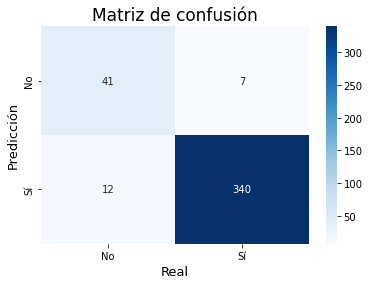

In [29]:
### Creo un for que pruebe en bucle cada modelo y las métricas, sirve para incluir otros modelos de ML

for modelo in modelos:

    wn.filterwarnings('ignore')

    print(f'El modelo que usaremos a continuacion es {modelo} ->')

    # Entreno los modelos
    modelo.fit(x_train_new, y_train_new)

    # Definimos el valor de prediccion
    y_train_pred = modelo.predict(x_train_new)
    y_pred = modelo.predict(x_test_new)

    # Calculo las métricas con F1 Score
    f1_train = np.mean(cross_val_score(modelo, x_train_new, y_train_new, cv=10, scoring='f1'))
    f1_test = np.mean(cross_val_score(modelo, x_test_new, y_test_new, cv=10, scoring='f1'))

    # Imprimimos los valores
    print(f'La métrica F1 Score del modelo de entrenamiento es de: {f1_train}')
    print(f'La métrica F1 Score del modelo de testeo es de: {f1_test}')

    # Uso además la matriz de confusión
    cm = confusion_matrix(y_test_new, y_pred)

    # Graficamos la matriz de confusión
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'],
               cmap = 'Blues')
    plt.ylabel('Predicción',fontsize=13)
    plt.xlabel('Real',fontsize=13)
    plt.title('Matriz de confusión',fontsize=17)
    plt.show()

Entonces, agregando nuevas variables al modelo se observa que los resultados de la matriz de confusión y de la métrica F1 Score coincide perfectamente con las obtenidas previamente, por lo que el modelo volvió a predecir de manera adecuada a los datos incluso con la agregación de otras variables.